<a href="https://colab.research.google.com/github/vkthakur90/jupyter_notebooks/blob/master/Non_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow.keras.models as tfkm
import tensorflow.keras.backend as tfkb
import tensorflow.keras.utils as tfku

In [3]:
data_df = pd.DataFrame({
    'x' : np.random.uniform(low = -3, high = 3, size = 10000),
    'e' : np.random.normal(loc = 0, scale = 1, size = 10000)
})

In [4]:
data_df.eval('y = x ** 3 - 6 * x ** 2 + 11 * x - 6 + 1.0 * e', inplace = True)

In [5]:
norm_data_df = 2.0 * (data_df - data_df.min())/(data_df.max() - data_df.min()) - 1

<Axes: xlabel='x', ylabel='y'>

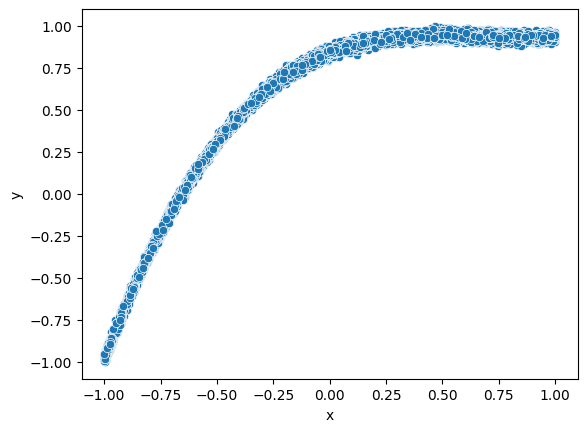

In [6]:
sns.scatterplot(x = 'x', y = 'y', data = norm_data_df)

In [7]:
class ResidualLayer(tfkl.Layer):
    def __init__(self, **kwds):
        super().__init__()
        self.num_hidden = kwds['num_hidden']

    def get_config(self):
        base_config = super().get_config()
        config = base_config.update({
            'num_hidden': self.num_hidden
        })

        return config

    def build(self, input_shape):
        in_channel = input_shape[-1]

        inp = tfkl.Input([in_channel])

        x = inp
        x = tfkl.Dense(self.num_hidden)(x)
        x = tfkl.Lambda(lambda t: tfkb.softplus(t) - tfkb.softplus(0.0))(x)
        x = tfkl.Dense(self.num_hidden)(x)
        x = tfkl.Add()([x, inp])
        out = x

        self.forward = tfkm.Model(inputs = [inp], outputs = [out])

    def call(self, input):
        return self.forward(input)

In [8]:
model = tfkm.Sequential([
    tfkl.InputLayer([1]),
    ResidualLayer(num_hidden = 3),
    ResidualLayer(num_hidden = 3),
    ResidualLayer(num_hidden = 3),
    ResidualLayer(num_hidden = 3),
    ResidualLayer(num_hidden = 3),
    tfkl.Dense(1)
])

In [9]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
model.fit(x = norm_data_df[['x']].values, y = norm_data_df[['y']].values, epochs = 5, batch_size = 8, shuffle = True)

Epoch 1/5
1250/1250 [==============================] - 13s 9ms/step - loss: 0.0603
Epoch 2/5
1250/1250 [==============================] - 11s 9ms/step - loss: 4.9405e-04
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 3.7714e-04
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 3.9334e-04
Epoch 5/5
1250/1250 [==============================] - 5s 4ms/step - loss: 3.8643e-04


In [11]:
norm_pred_df = pd.DataFrame({
    'x' : np.linspace(start = -1.0, stop = 1.0, num = 1000 + 1, endpoint = True)
})

In [12]:
norm_pred_df[['y']] = model.predict(norm_pred_df[['x']])

32/32 [==============================] - 0s 2ms/step


<Axes: xlabel='x', ylabel='y'>

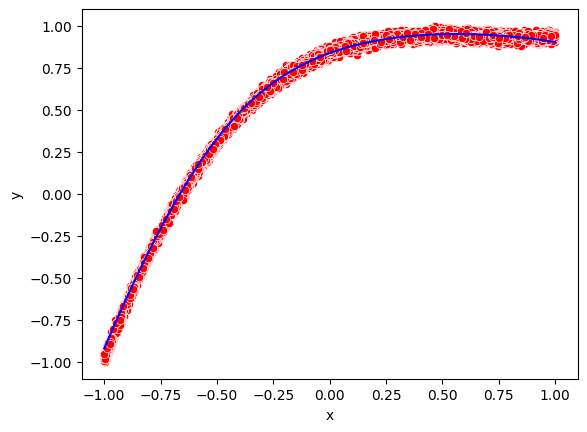

In [14]:
sns.scatterplot(x = 'x', y = 'y', data = norm_data_df, color = 'red')
sns.lineplot(x = 'x', y = 'y', data = norm_pred_df, color = 'blue')